In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__4',
                          'getabsth_auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__.7_.7_.85_.9',
                          'bigsum',
                          'option_wgt_1',
                          'chou_0501_-_manual_abscom2_-_2f860c8',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__4',
                          'getabsth_auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__.7_.7_.85_.9',
                          'bigsum',
                          'option_wgt_1',
                          'chou_0501_-_manual_abscom2_-_2f860c8',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 9 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 9

nref = 2

p_refs = (/ 1,  500 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 5,   4 /)

data wgt
     &     /.9, .85, .7, .7,
     &     5*.7/

planck_wgt_flux = 2

option_wgt = 1

klin = 6.375563e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

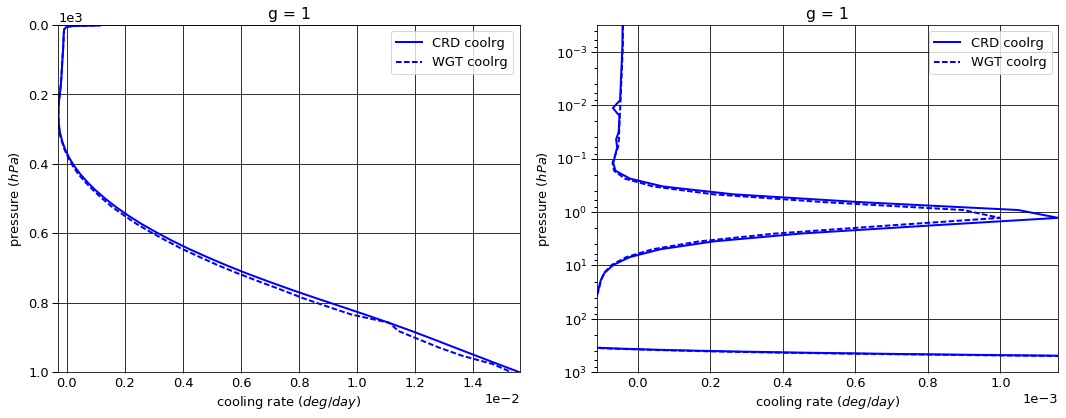

# Figure: cooling rate g-group 2

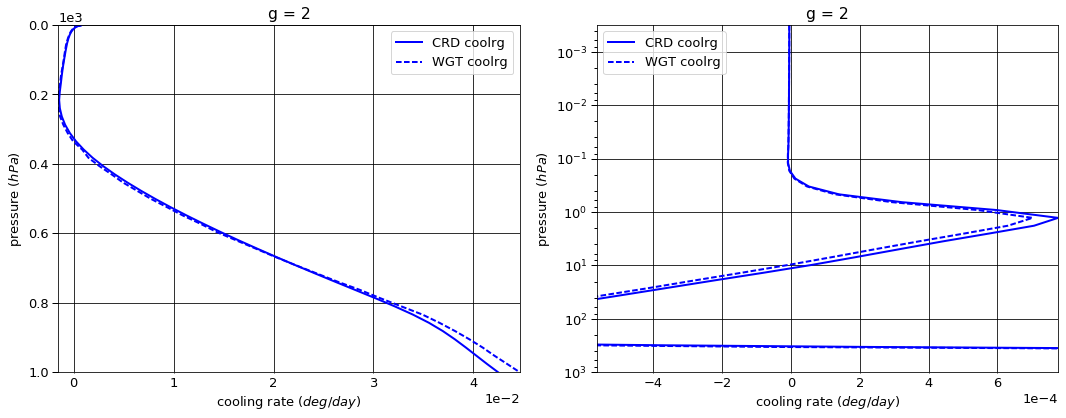

# Figure: cooling rate g-group 3

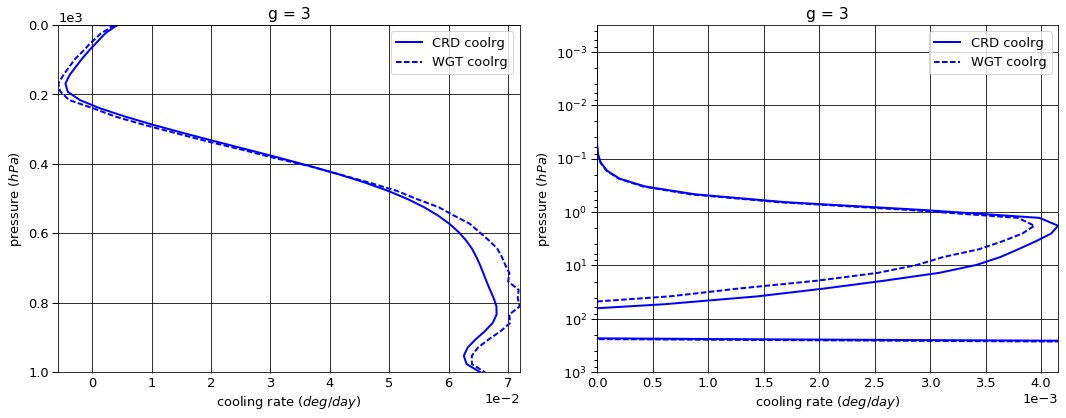

# Figure: cooling rate g-group 4

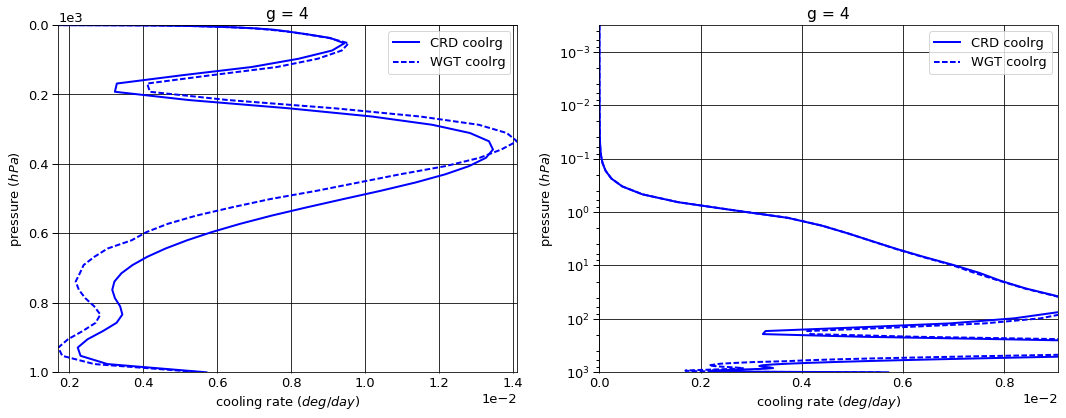

# Figure: cooling rate g-group 5

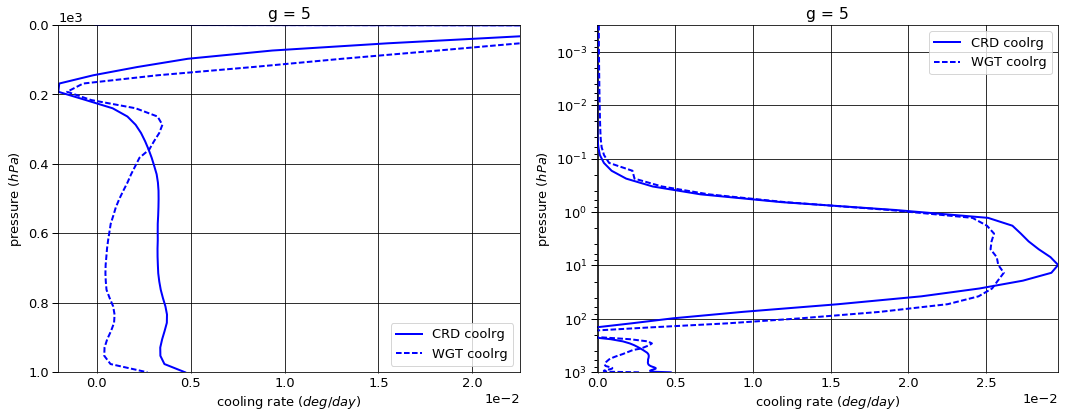

# Figure: cooling rate g-group 6

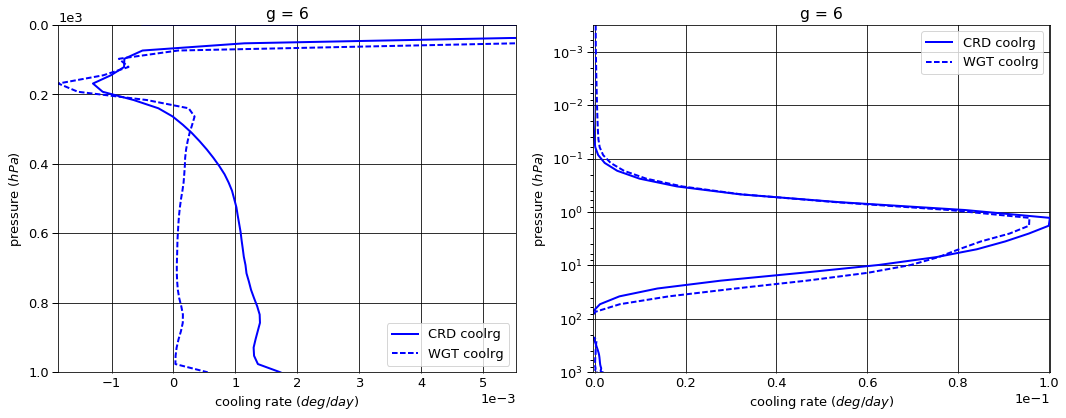

# Figure: cooling rate g-group 7

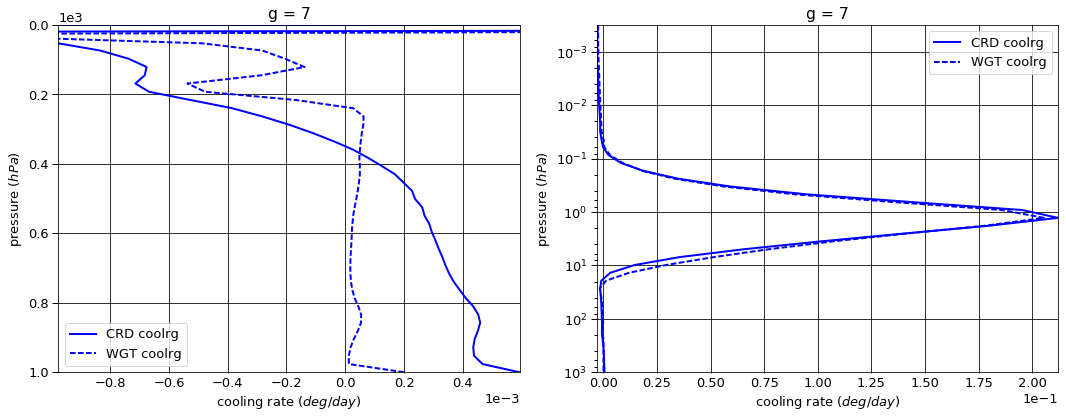

# Figure: cooling rate g-group 8

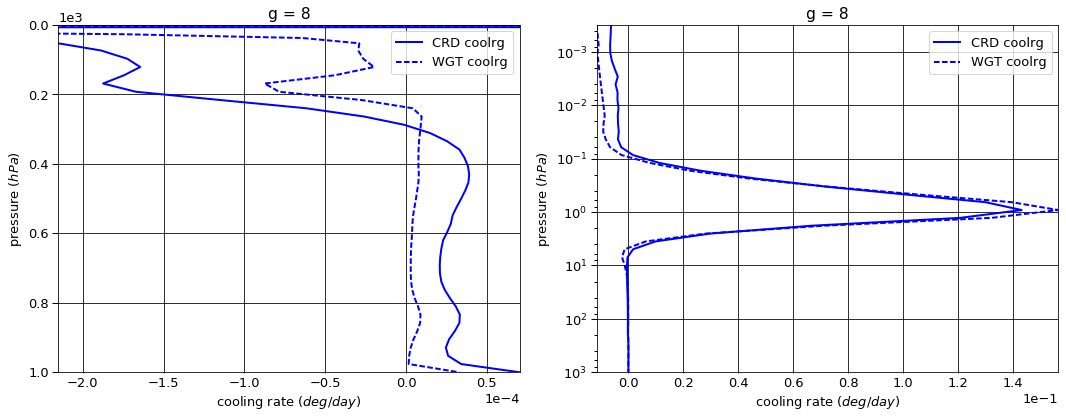

# Figure: cooling rate g-group 9

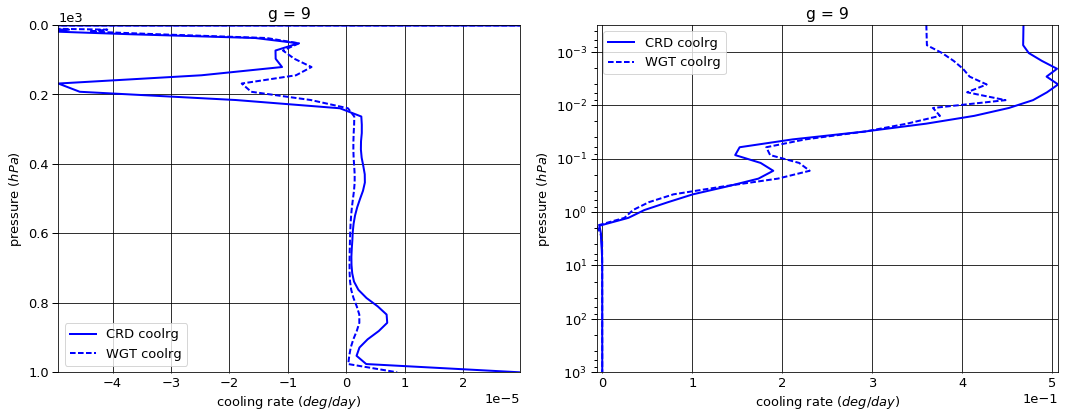

# Figure: cooling rate g-group total

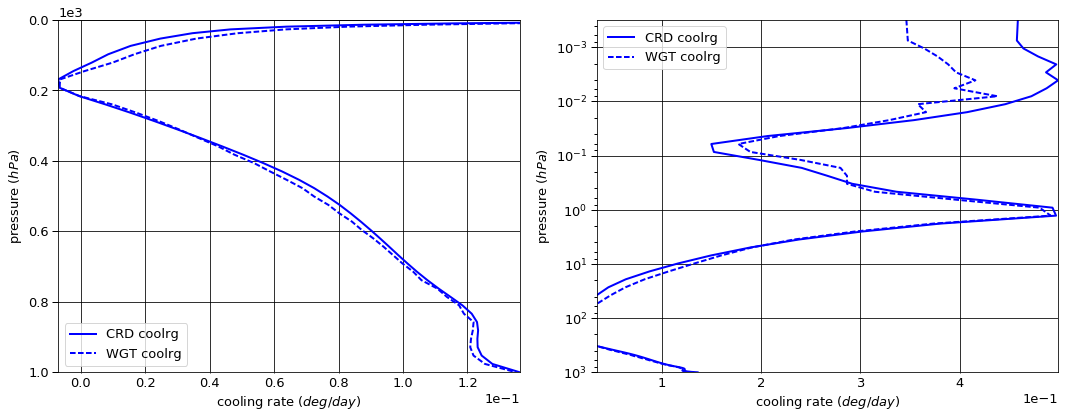

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -11.645191  0.000000 -11.645191
  1013.0   76    -11.775941  0.613046 -11.162895
2 0.0      1      -6.228516  0.000000  -6.228516
  1013.0   76     -6.846826  2.286234  -4.560591
3 0.0      1      -6.180788  0.000000  -6.180788
  1013.0   76     -9.456023  7.981200  -1.474824
4 0.0      1      -0.845048  0.000000  -0.845048
  1013.0   76     -2.227690  2.197555  -0.030136
5 0.0      1      -0.625265  0.000000  -0.625265
  1013.0   76     -1.420394  1.283317  -0.137077
6 0.0      1      -0.300672  0.000000  -0.300672
  1013.0   76     -0.626891  0.572915  -0.053976
7 0.0      1      -0.113902  0.000000  -0.113902
  1013.0   76     -0.206199  0.191331  -0.014868
8 0.0      1      -0.025032  0.000000  -0.025032
  1013.0   76     -0.039637  0.039172  -0.000465
9 0.0      1      -0.014466  0.000000  -0.014466
  1013.0   76     -0.037941  0.037847  -0.000094


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -11.650124  0.000000 -11.650124
  1013.0   76    -11.775941  0.588605 -11.187336
2 0.0      1      -6.228642  0.000000  -6.228642
  1013.0   76     -6.846826  2.309711  -4.537115
3 0.0      1      -6.068934  0.000000  -6.068934
  1013.0   76     -9.456023  8.230090  -1.225933
4 0.0      1      -0.788852  0.000000  -0.788852
  1013.0   76     -2.227690  2.202011  -0.025680
5 0.0      1      -0.424548  0.000000  -0.424548
  1013.0   76     -1.420394  1.410817  -0.009578
6 0.0      1      -0.236282  0.000000  -0.236282
  1013.0   76     -0.626891  0.625339  -0.001552
7 0.0      1      -0.107831  0.000000  -0.107831
  1013.0   76     -0.206199  0.205628  -0.000572
8 0.0      1      -0.025674  0.000000  -0.025674
  1013.0   76     -0.039637  0.039545  -0.000092
9 0.0      1      -0.013536  0.000000  -0.013536
  1013.0   76     -0.037941  0.037917  -0.000024


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.004933  0.000000 -0.004933
  1013.0   76     0.000000 -0.024440 -0.024441
2 0.0      1     -0.000126  0.000000 -0.000126
  1013.0   76     0.000000  0.023476  0.023476
3 0.0      1      0.111854  0.000000  0.111854
  1013.0   76     0.000000  0.248890  0.248890
4 0.0      1      0.056196  0.000000  0.056196
  1013.0   76     0.000000  0.004456  0.004456
5 0.0      1      0.200717  0.000000  0.200717
  1013.0   76     0.000000  0.127500  0.127500
6 0.0      1      0.064391  0.000000  0.064391
  1013.0   76     0.000000  0.052424  0.052424
7 0.0      1      0.006071  0.000000  0.006071
  1013.0   76     0.000000  0.014297  0.014297
8 0.0      1     -0.000642  0.000000 -0.000642
  1013.0   76     0.000000  0.000373  0.000373
9 0.0      1      0.000929  0.000000  0.000929
  1013.0   76     0.000000  0.000069  0.000069

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -4.213550e-05
  1001.112500 75     1.560259e-02
2 0.000312    1     -5.086569e-06
  1001.112500 75     4.248133e-02
3 0.000312    1     -4.748900e-06
  1001.112500 75     6.536283e-02
4 0.000312    1      8.007546e-07
  1001.112500 75     5.709099e-03
5 0.000312    1     -6.951020e-05
  1001.112500 75     4.699450e-03
6 0.000312    1     -5.057908e-04
  1001.112500 75     1.725091e-03
7 0.000312    1     -2.663334e-03
  1001.112500 75     5.941453e-04
8 0.000312    1     -6.273954e-03
  1001.112500 75     7.044273e-05
9 0.000312    1      4.681046e-01
  1001.112500 75     2.967633e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1     -4.092587e-05
  1001.112500 75     1.531751e-02
2 0.000312    1     -5.191712e-06
  1001.112500 75     4.464722e-02
3 0.000312    1     -4.751854e-06
  1001.112500 75     6.613806e-02
4 0.000312    1      9.879572e-07
  1001.112500 75     5.558507e-03
5 0.000312    1      7.242086e-05
  1001.112500 75     2.690382e-03
6 0.000312    1      1.922849e-04
  1001.112500 75     5.519404e-04
7 0.000312    1     -2.492650e-03
  1001.112500 75     2.015930e-04
8 0.000312    1     -1.154529e-02
  1001.112500 75     3.298523e-05
9 0.000312    1      3.601587e-01
  1001.112500 75     8.694033e-06


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.209629e-06
  1001.112500 75    -2.850830e-04
2 0.000312    1     -1.051434e-07
  1001.112500 75     2.165893e-03
3 0.000312    1     -2.954000e-09
  1001.112500 75     7.752290e-04
4 0.000312    1      1.872026e-07
  1001.112500 75    -1.505926e-04
5 0.000312    1      1.419311e-04
  1001.112500 75    -2.009068e-03
6 0.000312    1      6.980757e-04
  1001.112500 75    -1.173151e-03
7 0.000312    1      1.706843e-04
  1001.112500 75    -3.925523e-04
8 0.000312    1     -5.271332e-03
  1001.112500 75    -3.745750e-05
9 0.000312    1     -1.079459e-01
  1001.112500 75    -2.098229e-05

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.978879,0.000000,-25.978879
1013.0,76,-32.637543,15.202617,-17.434926



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.544422,0.000000,-25.544422
1013.0,76,-32.637543,15.649661,-16.987882



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.434457,0.000000,0.434457
1013.0,76,0.000000,0.447045,0.447044


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.458541
1001.112500,75,0.136275



WGT


,,coolrg
pressure,layer,
0.000312,1,0.346336
1001.112500,75,0.135147



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.112205
1001.112500,75,-0.001128


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.369312,0.354380
2,0.210687,0.208934
3,0.283687,0.294376
4,0.066500,0.069622
5,0.042563,0.044266
6,0.018750,0.019572
7,0.006188,0.006422
8,0.001187,0.001235
9,0.001125,0.001193


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.959058e-25
2,6.378566e-24
3,6.102842e-23
4,5.839038e-22
5,1.606302e-23
6,1.712697e-22
7,1.826139e-21
8,1.947095e-20
9,2.076063e-19


In [21]:
def spreadsheet():
    ng = 9
    ng_refs = [5, 4]
    p_refs = [1, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.959058e-25,NaN,0.369312,0.354380,0.369312,0.354380,500.0
2,6.378566e-24,21.556067,0.210687,0.208934,0.580000,0.563315,500.0
3,6.102842e-23,9.567734,0.283687,0.294376,0.863687,0.857690,500.0
4,5.839038e-22,9.567735,0.066500,0.069622,0.930187,0.927312,500.0
5,1.606302e-23,0.027510,0.042563,0.044266,0.972750,0.971578,1.0
6,1.712697e-22,10.662360,0.018750,0.019572,0.991500,0.991150,1.0
7,1.826139e-21,10.662360,0.006188,0.006422,0.997688,0.997572,1.0
8,1.947095e-20,10.662360,0.001187,0.001235,0.998875,0.998807,1.0
9,2.076063e-19,10.662360,0.001125,0.001193,1.000000,1.000000,1.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# Histogram of wavenumbers in g-group 1

In [24]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [25]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')